# Geodatenanalyse 1


## Tag 4 / Block 1 - Teil 11

## Geodatenanalyse mit *GeoPandas*

Ca. 20 Minuten

## Inhalt

- Übersicht über *GeoPandas*

- Datentypen und Formate

- Analysetools

- Koordinatensystem und Projektionen

- Abbildungen erstellen


In [1]:
import geopandas as geopd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np

## Was ist *GeoPandas*?

- GeoPandas ist ein Open-Source-Projekt, um die Arbeit mit Geodaten in Python zu erleichtern

- GeoPandas erweitert die von pandas verwendeten Datentypen, um räumliche Operationen auf geometrischen Typen zu ermöglichen

- Geometrische Operationen werden von shapely ausgeführt

- Geopandas ist außerdem abhängig von *fiona* für den Dateizugriff und *descartes* und *matplotlib* für das Plotten.

Weitere Informationen auf [GeoPandas](https://geopandas.org)

## Datentypen


- Ein *GeoSeries* ist ein Vektor, bei dem jeder Eintrag im Vektor ein Satz von Formen ist, die einer Beobachtung entsprechen. Diese können aus den folgenden bestehen:

  - *Points* / *Multi-Points*

  - *Lines* / *Multi-Lines*

  - *Polygons* / *Multi-Polygons*


- Ein *GeoDataFrame* ist eine tabellarische Datenstruktur, die eine *GeoSeries* enthält



## Geodaten lesen

*GeoPandas* kann mit einem Befehl fast jedes vektorbasierte Geodatenformat lesen:

``
geopandas.read_file()
``

Formate beinhalten ESRI Shapefile, Geodatenbanken, GeoJSON-Dateien und mehr.


In [2]:
filepath = geopd.datasets.get_path('naturalearth_lowres')
print(filepath)

C:\Users\gabriel\anaconda3\envs\geo\lib\site-packages\geopandas\datasets\naturalearth_lowres\naturalearth_lowres.shp


In [3]:
world = geopd.read_file(filepath)
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## Geodaten schreiben

*GeoDataFrames* können in viele verschiedene Standardformate exportiert werden:

In [4]:
world.to_file("test/countries.shp")

In [5]:
world.to_file("test/countries.geojson", driver='GeoJSON')

In [6]:
world.to_file("test/countries.gpkg", layer='countries', driver="GPKG")

### Zugriff auf Daten (Indizierung)

- Der Zugriff in *GeoPandas* erfolgt genau so wie auch in *Pandas*.

- Allerdings muss man hier die Spalte *geomtry* beachten

- Diese enthält nämlich die abzubildenden Geometrien

#### Beispiel Welt

In [8]:
world.name

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: name, Length: 177, dtype: object

In [16]:
mask = world.name == 'Germany'
de_id = np.where(mask)
world.iloc[de_id]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
121,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."


#### Beispiel Bundesländer in Deutschland

*Hinweis*: Die folgenden Daten stammen vom [Statistisches Bundesamt (Destatis) (2020)](https://www.arcgis.com/home/item.html?id=2842f834961b4702a179bdcb08f7b6c9)

In [18]:
file = "data/LAN_data/LAN_ew_18.shp"
states = geopd.read_file(file)
states

,OBJECTID,AGS,RS,SDV_RS,GEN,BEZ,IBZ,BEM,SN_L,SN_R,...,SN_V2,SN_G,FK_S3,NUTS,WSK,EWZ,KFL,SHAPE_Leng,SHAPE_Area,geometry
0,1,01,01,010020000000,Schleswig-Holstein,Land,20,--,01,0,...,00,000,0,DEF,2012/02/01 00:00:00.000,2896712,15804.35,2.876345e+06,4.575447e+10,"MULTIPOLYGON (((1082798.960 7087009.888, 10830..."
1,2,02,02,020000000000,Hamburg,Freie und Hansestadt,22,--,02,0,...,00,000,0,DE6,1974/01/01 00:00:00.000,1841179,755.09,3.947269e+05,2.099405e+09,"MULTIPOLYGON (((1083289.637 7086839.902, 10833..."
2,3,03,03,032410001001,Niedersachsen,Land,20,--,03,0,...,00,000,0,DE9,2015/01/01 00:00:00.000,7982448,47709.46,4.016376e+06,1.299952e+11,"MULTIPOLYGON (((1088007.233 7085557.419, 10879..."
3,4,04,04,040110000000,Bremen,Freie Hansestadt,23,--,04,0,...,00,000,0,DE5,2010/01/01 00:00:00.000,682986,419.36,3.358093e+05,1.119276e+09,"MULTIPOLYGON (((959173.008 7019525.886, 959041..."
4,5,05,05,051110000000,Nordrhein-Westfalen,Land,20,--,05,0,...,00,000,0,DEA,2009/11/01 00:00:00.000,17932651,34112.18,2.648595e+06,8.782953e+10,"MULTIPOLYGON (((690749.547 6537167.305, 690774..."
5,6,06,06,064140000000,Hessen,Land,20,--,06,0,...,00,000,0,DE7,2015/01/01 00:00:00.000,6265809,21115.69,2.148502e+06,5.235886e+10,"MULTIPOLYGON (((966318.564 6381149.380, 966403..."
6,7,07,07,073150000000,Rheinland-Pfalz,Land,20,--,07,0,...,00,000,0,DEB,2004/01/01 00:00:00.000,4084844,19858.00,1.774566e+06,4.783878e+10,"POLYGON ((869270.349 6610476.069, 869673.445 6..."
7,8,08,08,081110000000,Baden-Württemberg,Land,20,--,08,0,...,00,000,0,DE1,1997/01/01 00:00:00.000,11069533,35748.16,2.543716e+06,8.151764e+10,"MULTIPOLYGON (((966483.356 6380537.468, 966260..."
8,9,09,09,091620000000,Bayern,Freistaat,21,--,09,0,...,00,000,0,DE2,2011/07/01 00:00:00.000,13076721,70548.66,3.898208e+06,1.634855e+11,"POLYGON ((1163731.745 6033234.921, 1163785.112..."
9,10,10,10,100410100100,Saarland,Land,20,--,10,0,...,00,000,0,DEC,2009/01/01 00:00:00.000,990509,2571.11,5.628089e+05,6.060730e+09,"POLYGON ((785813.182 6382525.660, 786233.113 6..."


In [19]:
states.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
# in UTM Zone 32 projezieren ...
states = states.to_crs("epsg:32632")

idx = states.EWZ.argmin()
idx

3

In [22]:
states.GEN[idx]

'Bremen'

In [23]:
area = states.iloc[7].geometry.area / states.iloc[8].geometry.area
print('Die Fläche von Baden-Württemberg ist {:.2f}% der Fläche von Bayern!'.format(area*100))

Die Fläche von Baden-Württemberg ist 50.63% der Fläche von Bayern!


In [24]:
habitants = states.loc[7, 'EWZ'] / states.loc[8, 'EWZ']
print('Die Einwohnerzehl von Baden-Württemberg ist {:.2f}% der Einwohnerzahl von Bayern!'.format(habitants*100))

Die Einwohnerzehl von Baden-Württemberg ist 84.65% der Einwohnerzahl von Bayern!


## Analysetools

*GeoPandas* hat viele eingebaute Analysetools, vor allem diejenigen von *shapely*.

#### Beispiel: Rechteck und Zentrum

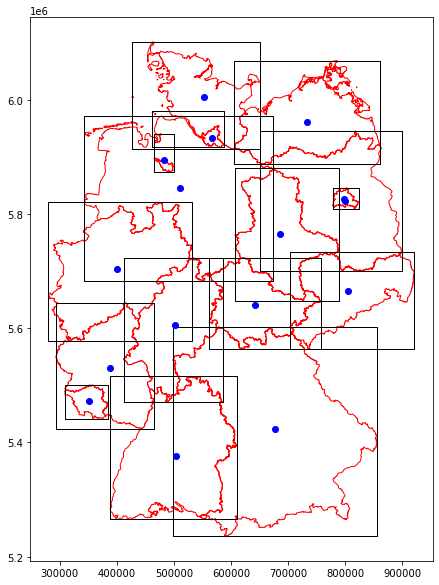

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

states['envelope'] = states.geometry.envelope
states['centroid'] = states.geometry.centroid

states.geometry.plot(ax=ax, facecolor='none', edgecolor='r')

states.envelope.plot(ax=ax, facecolor='none', edgecolor='k')

states.centroid.plot(ax=ax, c='b')

plt.show()

### Beispiel Umriss von Deutschland ausrechnen

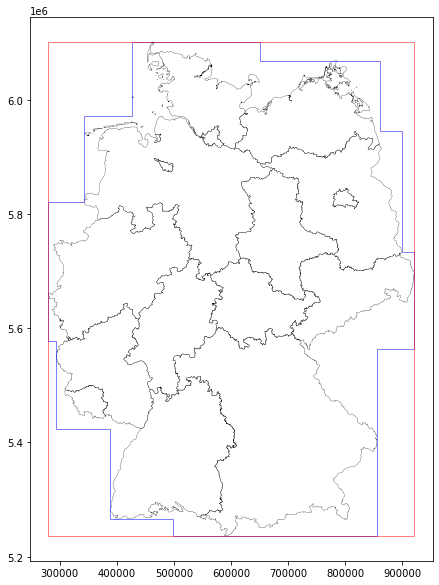

In [15]:
from descartes import PolygonPatch

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

states.plot(ax=ax, facecolor='none', edgecolor='k', lw=0.25)

ax.add_patch(PolygonPatch(states.envelope.unary_union, fc='none', ec='b', alpha=0.5))

ax.add_patch(PolygonPatch(states.envelope.unary_union.envelope, fc='none', ec='r', alpha=0.5))

ax.axis('scaled')
plt.show()

In [29]:
print(states.envelope.unary_union.envelope)

POLYGON ((280371.0591092815 5235855.976802382, 921292.3711776335 5235855.976802382, 921292.3711776335 6101443.712534043, 280371.0591092815 6101443.712534043, 280371.0591092815 5235855.976802382))


### Geometrien auswerten

In [30]:
from shapely.geometry import Polygon

polys1 = geopd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]), Polygon([(2,2), (4,2), (4,4), (2,4)])])

polys2 = geopd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]), Polygon([(3,3), (5,3), (5,5), (3,5)])])

df1 = geopd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df2 = geopd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

<AxesSubplot:>

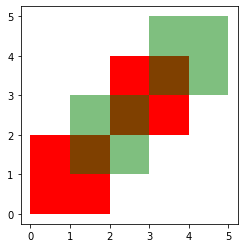

In [32]:
ax = df1.plot(color='red')
df2.plot(ax=ax, color='green', alpha=0.5)

<AxesSubplot:>

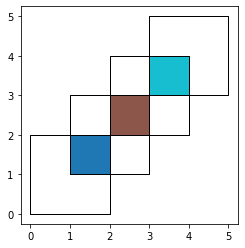

In [33]:
res_intersection = geopd.overlay(df1, df2, how='intersection')

ax = res_intersection.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

### Geometrien testen

*GeoPandas* hat viele eingebaute Methoden, um Geometrien gegeneinander zu testen.

Beispiele:

- Angrenzung: Die Methode *touches()*

- Überlappung: Die Methode *overlaps()*

- Beinhaltung: Die Methode *within()*

Weitere Beispiele befinden sich im [Methodenhandbuch von *GeoPandas*](https://geopandas.org/docs/reference/geoseries.html)

In [38]:
# grenzt Baden-Württemberg an Bayern?
bw_id = np.where(states.GEN == 'Baden-Württemberg')[0]
by_id = np.where(states.GEN == 'Bayern')[0]

bw = states.loc[bw_id].geometry
by = states.loc[by_id].geometry
bw

7    MULTIPOLYGON (((477035.141 5496309.300, 476890...
Name: geometry, dtype: geometry

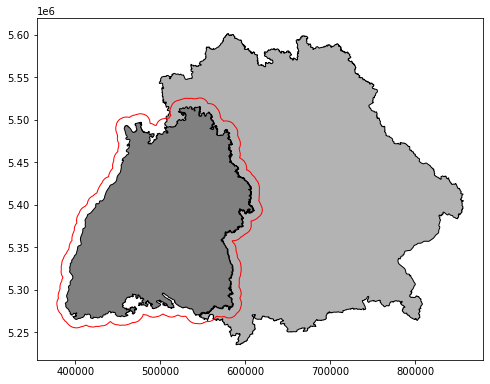

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

by.plot(ax=ax, edgecolor='k', facecolor='0.7')

bw.plot(ax=ax, edgecolor='k', facecolor='0.5')

bw.buffer(10000).plot(ax=ax, edgecolor='r', facecolor='none')

plt.show()

An welche Bundesländer grenzt Baden-Württemberg?

In [40]:
for i, row in states.iterrows():
    test = bw.buffer(1000).overlaps(row.geometry)
    if (test.values):
        print(row.GEN)

Hessen
Rheinland-Pfalz
Bayern


## Koordinaten und Projektionen

- Das Koordinatenreferenzsystem (CRS) ist wichtig, weil die geometrischen Formen in einem *GeoSeries*- oder *GeoDataFrame*-Objekt einfach eine Sammlung von Koordinaten in einem beliebigen Raum sind

- Ein CRS sagt Python, wie sich diese Koordinaten zu Orten auf der Erde verhalten

In [41]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Koordinatensystem manuell setzen

Das Koordinatensystem kann ganz einfach über das Feld *crs* geändert werden: 

In [19]:
# Robinson Projektion
world.crs = "ESRI:54030"
world.crs

<Projected CRS: ESRI:54030>
Name: World_Robinson
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Robinson
- method: Robinson
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Koordinatensystem ändern

Das Koordinatensystem kann ganz einfach, z.B. über EPSG-Codes, geändert werden: 

In [44]:
# zurück setzen
world.crs = "EPSG:4326"

# Projektion ...
world_robin = world.to_crs("ESRI:54030")
world_robin.crs

<Projected CRS: ESRI:54030>
Name: World_Robinson
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Robinson
- method: Robinson
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Abbildungen

### Einfache Abbildungen

In [46]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

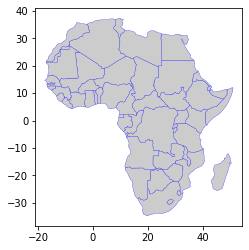

In [49]:
afr_id = np.where(world.continent == 'Africa')

world.iloc[afr_id].plot(facecolor='0.8', edgecolor='b', lw=0.25)

### Abbildungen von Eigenschaften

In [61]:
file = "data/LAN_data/LAN_ew_18.shp"
states = geopd.read_file(file)
states

,OBJECTID,AGS,RS,SDV_RS,GEN,BEZ,IBZ,BEM,SN_L,SN_R,...,SN_V2,SN_G,FK_S3,NUTS,WSK,EWZ,KFL,SHAPE_Leng,SHAPE_Area,geometry
0,1,01,01,010020000000,Schleswig-Holstein,Land,20,--,01,0,...,00,000,0,DEF,2012/02/01 00:00:00.000,2896712,15804.35,2.876345e+06,4.575447e+10,"MULTIPOLYGON (((1082798.960 7087009.888, 10830..."
1,2,02,02,020000000000,Hamburg,Freie und Hansestadt,22,--,02,0,...,00,000,0,DE6,1974/01/01 00:00:00.000,1841179,755.09,3.947269e+05,2.099405e+09,"MULTIPOLYGON (((1083289.637 7086839.902, 10833..."
2,3,03,03,032410001001,Niedersachsen,Land,20,--,03,0,...,00,000,0,DE9,2015/01/01 00:00:00.000,7982448,47709.46,4.016376e+06,1.299952e+11,"MULTIPOLYGON (((1088007.233 7085557.419, 10879..."
3,4,04,04,040110000000,Bremen,Freie Hansestadt,23,--,04,0,...,00,000,0,DE5,2010/01/01 00:00:00.000,682986,419.36,3.358093e+05,1.119276e+09,"MULTIPOLYGON (((959173.008 7019525.886, 959041..."
4,5,05,05,051110000000,Nordrhein-Westfalen,Land,20,--,05,0,...,00,000,0,DEA,2009/11/01 00:00:00.000,17932651,34112.18,2.648595e+06,8.782953e+10,"MULTIPOLYGON (((690749.547 6537167.305, 690774..."
5,6,06,06,064140000000,Hessen,Land,20,--,06,0,...,00,000,0,DE7,2015/01/01 00:00:00.000,6265809,21115.69,2.148502e+06,5.235886e+10,"MULTIPOLYGON (((966318.564 6381149.380, 966403..."
6,7,07,07,073150000000,Rheinland-Pfalz,Land,20,--,07,0,...,00,000,0,DEB,2004/01/01 00:00:00.000,4084844,19858.00,1.774566e+06,4.783878e+10,"POLYGON ((869270.349 6610476.069, 869673.445 6..."
7,8,08,08,081110000000,Baden-Württemberg,Land,20,--,08,0,...,00,000,0,DE1,1997/01/01 00:00:00.000,11069533,35748.16,2.543716e+06,8.151764e+10,"MULTIPOLYGON (((966483.356 6380537.468, 966260..."
8,9,09,09,091620000000,Bayern,Freistaat,21,--,09,0,...,00,000,0,DE2,2011/07/01 00:00:00.000,13076721,70548.66,3.898208e+06,1.634855e+11,"POLYGON ((1163731.745 6033234.921, 1163785.112..."
9,10,10,10,100410100100,Saarland,Land,20,--,10,0,...,00,000,0,DEC,2009/01/01 00:00:00.000,990509,2571.11,5.628089e+05,6.060730e+09,"POLYGON ((785813.182 6382525.660, 786233.113 6..."


<AxesSubplot:>

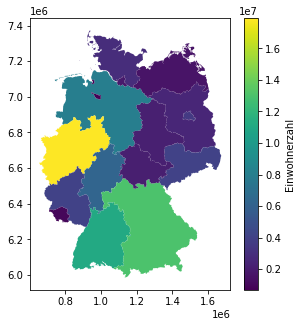

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

states.plot(ax=ax, column='EWZ', legend=True, legend_kwds={'label': "Einwohnerzahl", 'orientation': "vertical"})

### Abbildungen mit Hintergrund

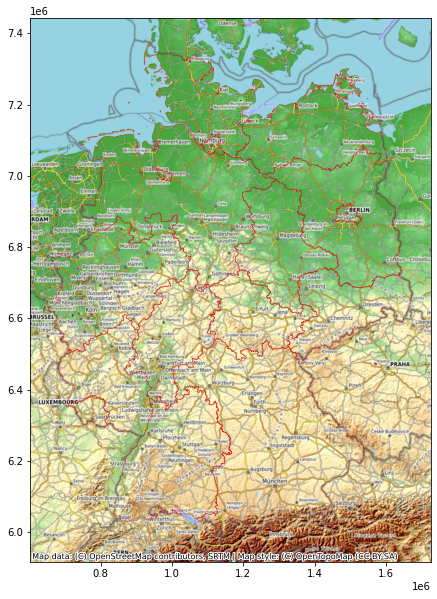

In [54]:
ax = states.plot(figsize=(10, 10), facecolor='none', edgecolor='r', lw=0.25)

ctx.add_basemap(ax, crs=states.crs.to_string(), source=ctx.providers.OpenTopoMap)

*Hinweis*: Daten kommen vom [Landesamt für Geoinformation und Landentwicklung](https://www.lgl-bw.de/unsere-themen/Produkte/Open-Data/)

In [60]:
gemeinden = geopd.read_file("data/Gebiete/AX_KommunalesGebiet.shp")

np.where(gemeinden.Name == 'Karlsruhe')

gemeinden.iloc[737]

Name                                                 Karlsruhe
Schlüssel                                             08212000
geometry     POLYGON ((458863.0949999997 5437752.741, 45857...
Name: 737, dtype: object

In [59]:
gemeinden

,Name,Schlüssel,geometry
0,Binzen,08336008,"POLYGON ((395427.789 5275304.530, 395435.586 5..."
1,Lörrach,08336050,"POLYGON ((403118.738 5280499.704, 403131.423 5..."
2,Weil am Rhein,08336091,"POLYGON ((392965.259 5276572.860, 392957.343 5..."
3,Grenzach-Wyhlen,08336105,"POLYGON ((402282.695 5269916.008, 402398.069 5..."
4,Maulburg,08336057,"POLYGON ((407864.971 5278228.492, 407859.503 5..."
...,...,...,...
1098,Igersheim,08128058,"MULTIPOLYGON (((560577.272 5491852.191, 560588..."
1099,Weikersheim,08128126,"POLYGON ((564151.979 5489261.296, 564183.516 5..."
1100,Freudenberg,08128039,"POLYGON ((527157.394 5513965.821, 527154.185 5..."
1101,Wertheim,08128131,"POLYGON ((546709.363 5515539.572, 546709.873 5..."


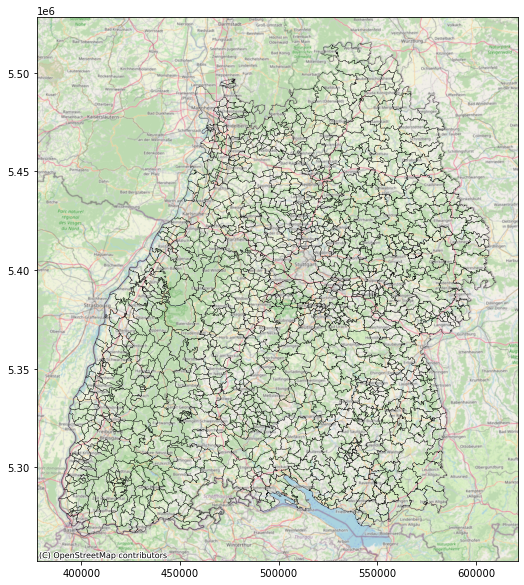

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

gemeinden.plot(ax=ax, facecolor='none', edgecolor='k', lw=0.25)

ctx.add_basemap(ax, crs=gemeinden.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

## ENDE